In [96]:
import numpy as np
import pandas as pd

In [97]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [98]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5538,ham,I can't believe how attached I am to seeing yo...,NaN,NaN,NaN
2554,ham,I'll reach in ard 20 mins ok...,NaN,NaN,NaN
4741,ham,Ya very nice. . .be ready on thursday,NaN,NaN,NaN
5391,ham,Watching ajith film ah?,NaN,NaN,NaN
4919,ham,"G says you never answer your texts, confirm/deny",NaN,NaN,NaN


In [99]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [100]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [102]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4468,ham,"Nothing, smsing u n xy lor. Sorry lor da guys ...",NaN,NaN,NaN
961,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
3299,ham,Just do what ever is easier for you,NaN,NaN,NaN
4850,ham,Gain the rights of a wife.dont demand it.i am ...,NaN,NaN,NaN
3744,ham,"Aight, let me know when you're gonna be around...",NaN,NaN,NaN


In [103]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'},inplace=True)

In [104]:
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
3495,ham,Happy birthday... May u find ur prince charmin...,NaN,NaN,NaN
1819,ham,Dunno dat's wat he told me. Ok lor...,NaN,NaN,NaN
642,ham,Probably gonna swing by in a wee bit,NaN,NaN,NaN
3205,ham,At home also.,NaN,NaN,NaN
2601,ham,Okie,NaN,NaN,NaN


In [105]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [106]:
df.sample(5)

,target,text
4316,ham,HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HO...
4854,ham,Same to u...
2376,ham,I'm on my way home. Went to change batt 4 my w...
684,ham,I wanted to ask Ì_ to wait 4 me to finish lect...
3472,ham,You getting back any time soon?


In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [108]:
df['target'] = encoder.fit_transform(df['target'])

In [109]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [111]:
df.duplicated().sum()

403

In [112]:
df = df.drop_duplicates(keep = 'first')

In [113]:
df.duplicated().sum()

0

## 2. EDA

In [114]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [115]:
import matplotlib.pyplot as plt

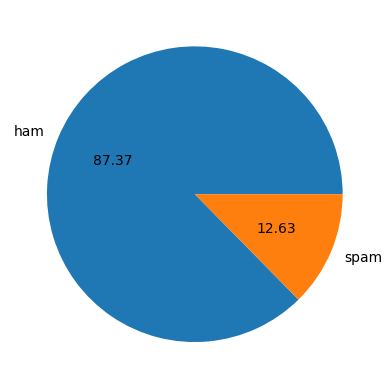

In [116]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%.02f')
plt.show()

In [117]:
# Data is imbalanced

In [118]:
import nltk

In [119]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YAJUR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
df['num_alphabets'] = df['text'].apply(len)

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_16732\212389269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_alphabets'] = df['text'].apply(len)


In [121]:
df.head()

,target,text,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [122]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_16732\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [123]:
df.head()

,target,text,num_alphabets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [124]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_16732\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [125]:
df.head()

,target,text,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [126]:
df[['num_alphabets', 'num_words', 'num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [127]:
# For ham
df[df['target']==0][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [128]:
# For spam
df[df['target']==1][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [129]:
import seaborn as sns

<Axes: xlabel='num_alphabets', ylabel='Count'>

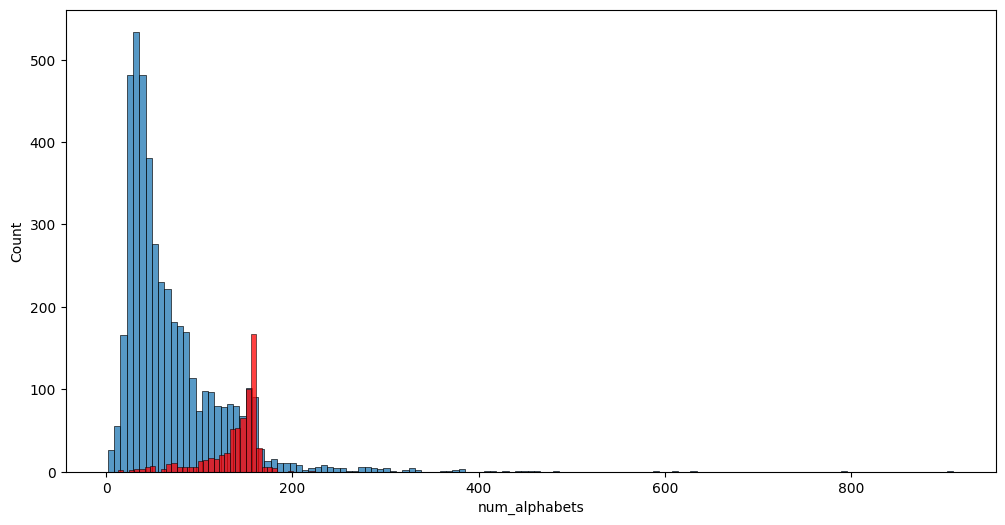

In [130]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_alphabets'])
sns.histplot(df[df['target'] == 1]['num_alphabets'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

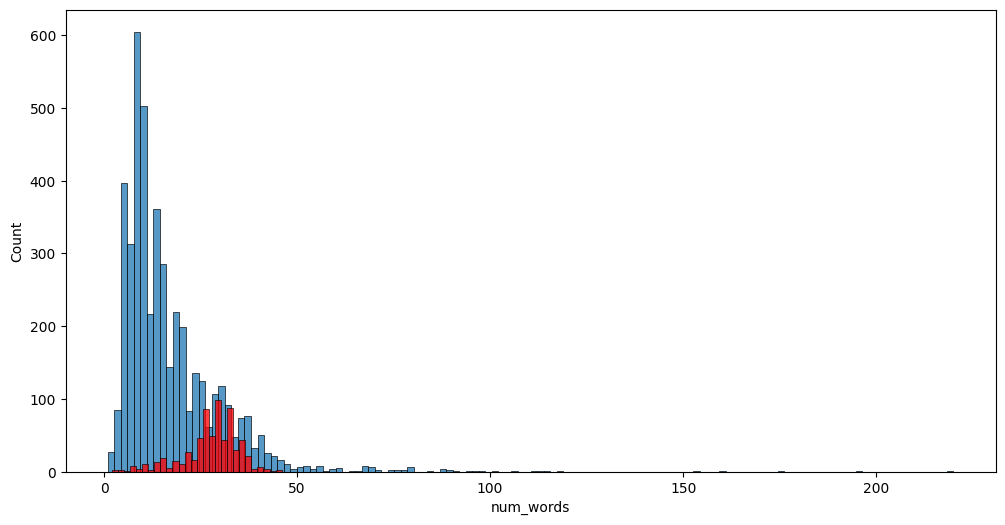

In [131]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

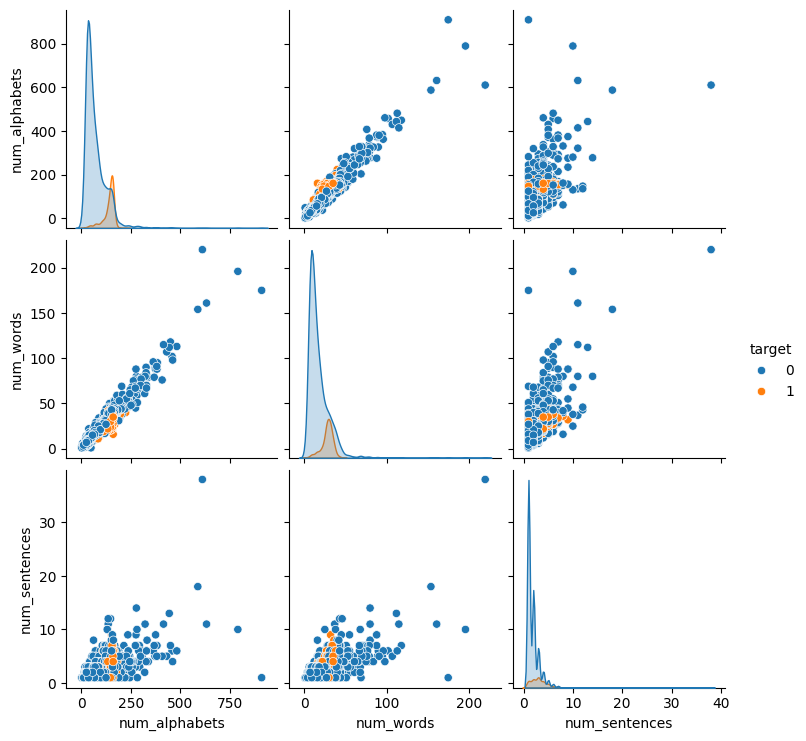

In [132]:
sns.pairplot(df,hue='target')

In [133]:
numeric_df = df.select_dtypes(include='number')

<Axes: >

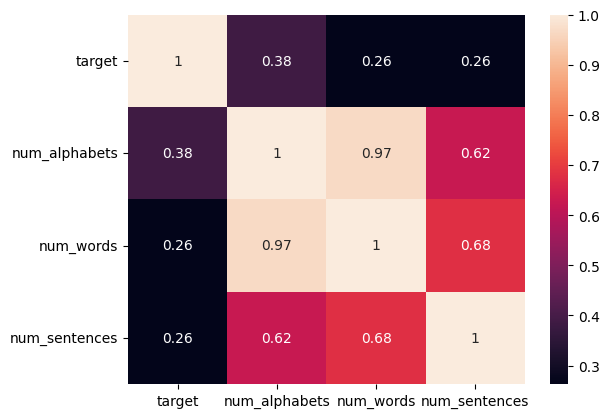

In [134]:
sns.heatmap(numeric_df.corr(),annot=True)

In [135]:
# Strong multicolinear relation between num_alphabets, num_words and num-sentences
# Since we're keeping one column we would keep num_alphabets as it has highest colinearity with target

## 3. Data Preprocessing

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [136]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [137]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YAJUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_16732\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [141]:
df['transformed_text'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transformed_text, dtype: object

In [142]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [143]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

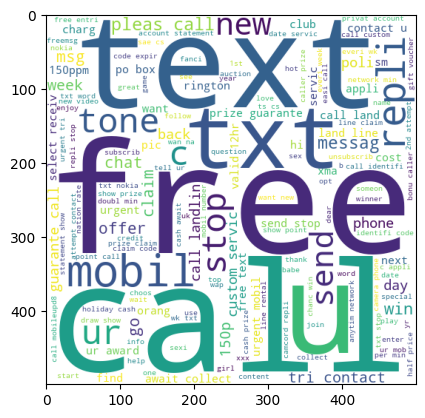

In [144]:
plt.imshow(spam_wc)

In [145]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

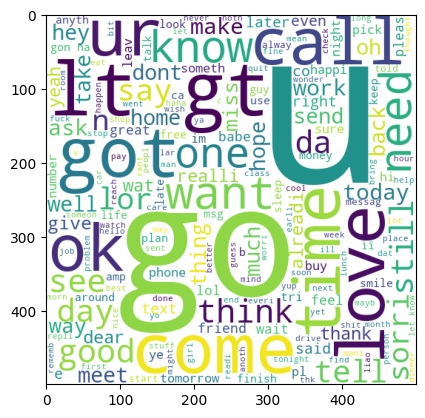

In [146]:
plt.imshow(ham_wc)

In [147]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [148]:
len(spam_corpus)

9939

In [149]:
from collections import Counter
spam_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_common_words

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [150]:
spam_common_words.columns = ['words', 'freq']
spam_common_words

,words,freq
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


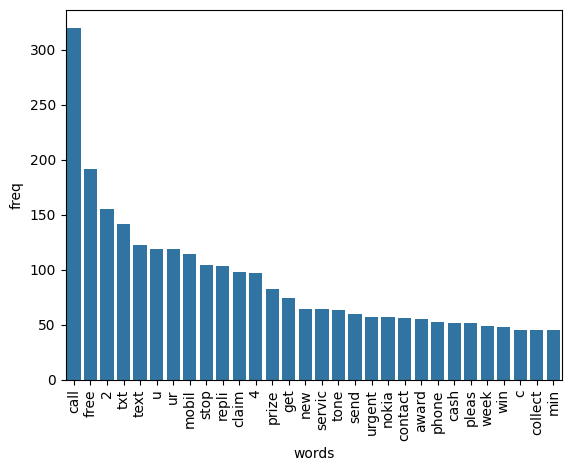

In [151]:
sns.barplot(x='words', y='freq', data=spam_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [152]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [153]:
ham_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [154]:
ham_common_words.columns = ['words','freq']

sns.barplot(x='words', y='freq', data=ham_common_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [190]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [191]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [192]:
X.shape

(5169, 6708)

In [193]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [196]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [197]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [198]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [199]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [200]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [201]:
tfidf = TfidfVectorizer(max_features=3000)
Xt = tfidf.fit_transform(df['transformed_text']).toarray()

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [203]:
X = np.hstack((X,df['num_alphabets'].values.reshape(-1,1)))

In [204]:
Xt.shape

(5169, 3000)

In [205]:
Xt_train, Xt_test, y_train, y_test = train_test_split(Xt,y,test_size=0.2,random_state=2)

In [206]:
gnb.fit(Xt_train,y_train)
y_pred1 = gnb.predict(Xt_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [207]:
mnb.fit(Xt_train,y_train)
y_pred2 = mnb.predict(Xt_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [208]:
bnb.fit(Xt_train,y_train)
y_pred3 = bnb.predict(Xt_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [189]:
# tfidf mnb

In [209]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))